## Assignment: Applying Model Evaluation Techniques


**Objective:** Apply the model evaluation concepts learned in this notebook to a new dataset and task. You will practice data loading, model training, evaluating performance using appropriate metrics, and utilizing cross-validation.

**Dataset:** [Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification)



**Task:**

1.  **Data Exploration:**
    *   Perform basic exploratory data analysis (EDA) to understand the data structure, identify missing values, and visualize key features (e.g., distributions, relationships).
2.  **Data Preprocessing:**
    *   Handle missing values (e.g., imputation, dropping rows/columns).
    *   Encode categorical features if necessary
    *   Split the data into training and testing sets.
3.  **Model Selection and Training:**
    *   Choose at least one appropriate model (e.g., Logistic Regression, SVM, Decision Tree).
    *   Train the selected model(s) on the training data.
4.  **Model Evaluation (Initial):**
    *   Evaluate the trained model(s) on the test set using the appropriate metrics covered in this notebook: Accuracy, Precision, Recall, F1-score, Confusion Matrix (visualize the confusion matrix), AUC.
    *   Discuss the initial performance based on these metrics.
5.  **Cross-Validation:**
    *   Implement K-Fold Cross-Validation (e.g., with k=5 or 10) on your chosen model and the full dataset.
    *   Calculate and report the mean and standard deviation of the cross-validation scores.
    *   Compare the performance estimate from cross-validation to the initial evaluation on the single test split.
6.  **Interpretation and Conclusion:**
    *   Summarize your findings. What do the evaluation metrics tell you about your model's performance?
    *   Discuss any challenges encountered and potential next steps (e.g., feature engineering, trying different models, hyperparameter tuning).

**Deliverables:**

*   A Jupyter Notebook containing all the code used for data loading, preprocessing, model training, and evaluation. Ensure your code is well-commented.
*   Include markdown cells explaining your steps, observations, and interpretations of the results and evaluation metrics.
*   Include visualizations where appropriate (e.g., confusion matrix heatmap, scatter plot of actual vs. predicted values for regression).
*   A brief written summary (can be within the notebook) outlining your key findings, the performance of your model(s), and reflections on the evaluation process.


# **1. Data Exploration**
    *   Perform basic exploratory data analysis (EDA) to understand the data structure
    *   Identify missing values
    *   Visualize key features (e.g., distributions, relationships).

## Load the Mushroom Classification dataset and examine its structure

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import kagglehub
import os
import seaborn as sns
sns.set()

Load the dataset

In [33]:
df = pd.read_csv('/content/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Check the columns and features of the dataset

In [34]:
# Get the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get information about the DataFrame
print("\nDataFrame Info:")
df.info()

Shape of the DataFrame: (8124, 23)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  

Check the column types

In [35]:
display(df.describe())


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


- We observe that all of the columns of this dataset are categorical columns

## Check for missing values

In [36]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


- We see that there are no missing values in the dataset

## Feature Analysis

Visualize the distribution of the target variable ('class').

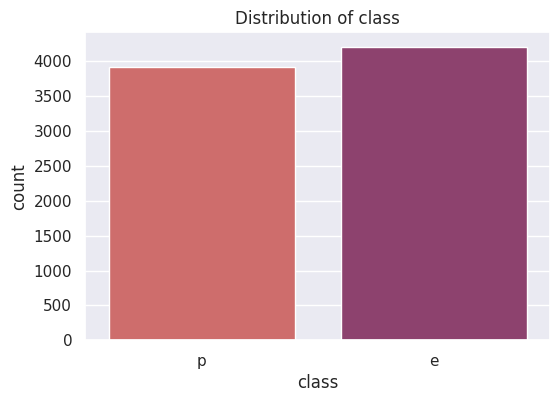

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="class", palette="flare", hue="class")
plt.title("Distribution of class")
plt.show()

- We see that the target is balanced and that there are more edible mushrooms than poisonous ones.

Analyze the distribution of each feature and its relationship with the target ('class').


- Distribution of mushroom cap related features.

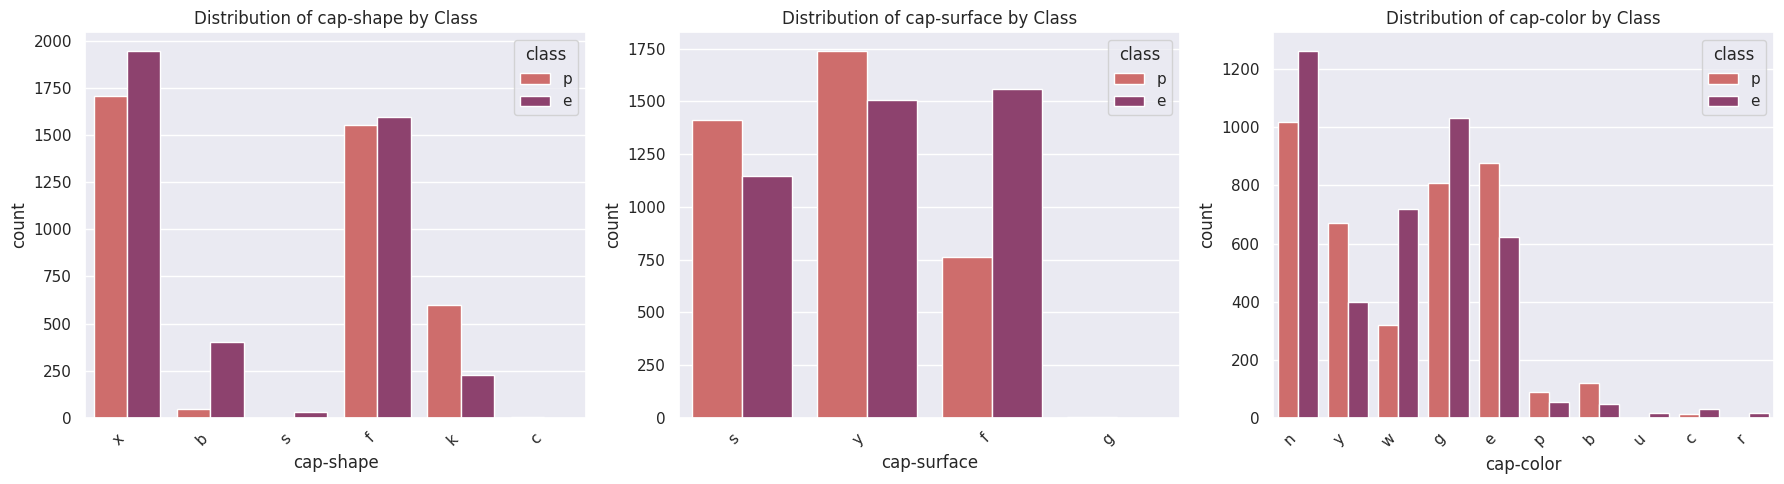

In [38]:
# Distribution of mushroom cap related features.
cap_features = ['cap-shape', 'cap-surface', 'cap-color']

plt.figure(figsize=(18, 5))

for i, column in enumerate(cap_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=column, hue='class', palette="flare", data=df)
    plt.title(f'Distribution of {column} by Class')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Distribution of 'bruises' and 'odor'.

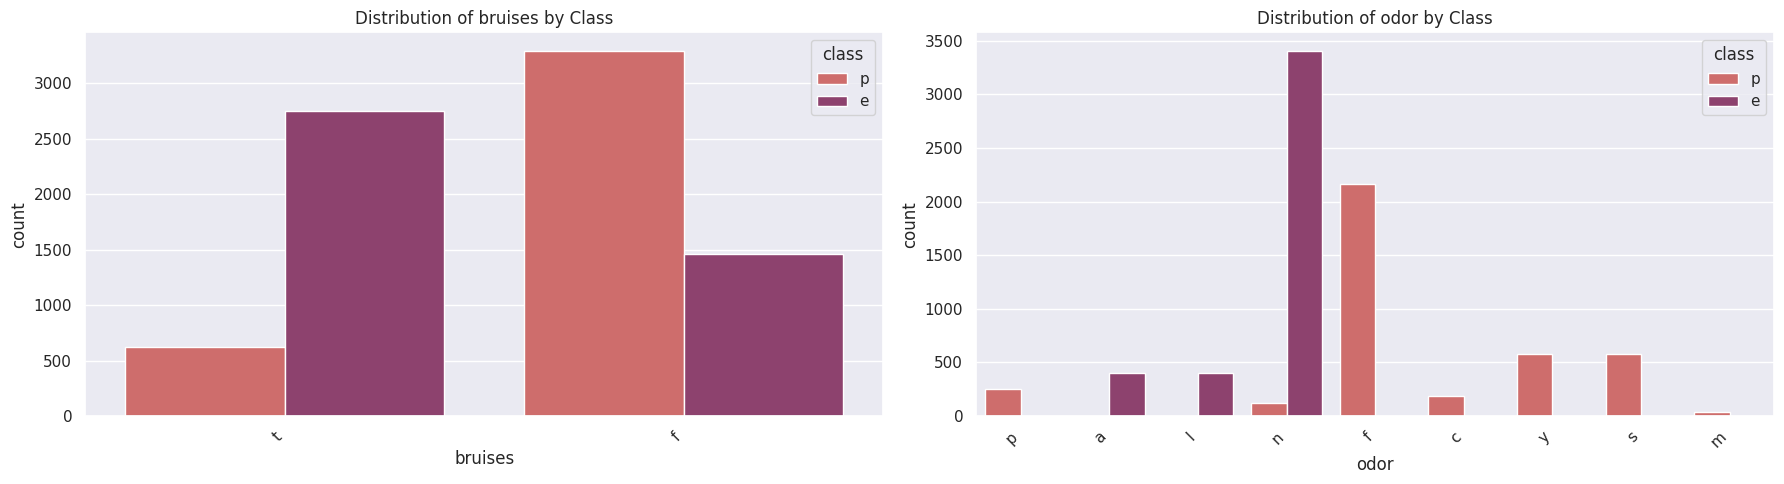

In [39]:
cap_features = ['bruises', 'odor']

plt.figure(figsize=(18, 5))

for i, column in enumerate(cap_features):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=column, hue='class', palette="flare", data=df)
    plt.title(f'Distribution of {column} by Class')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Distribution of mushroom gill related features.

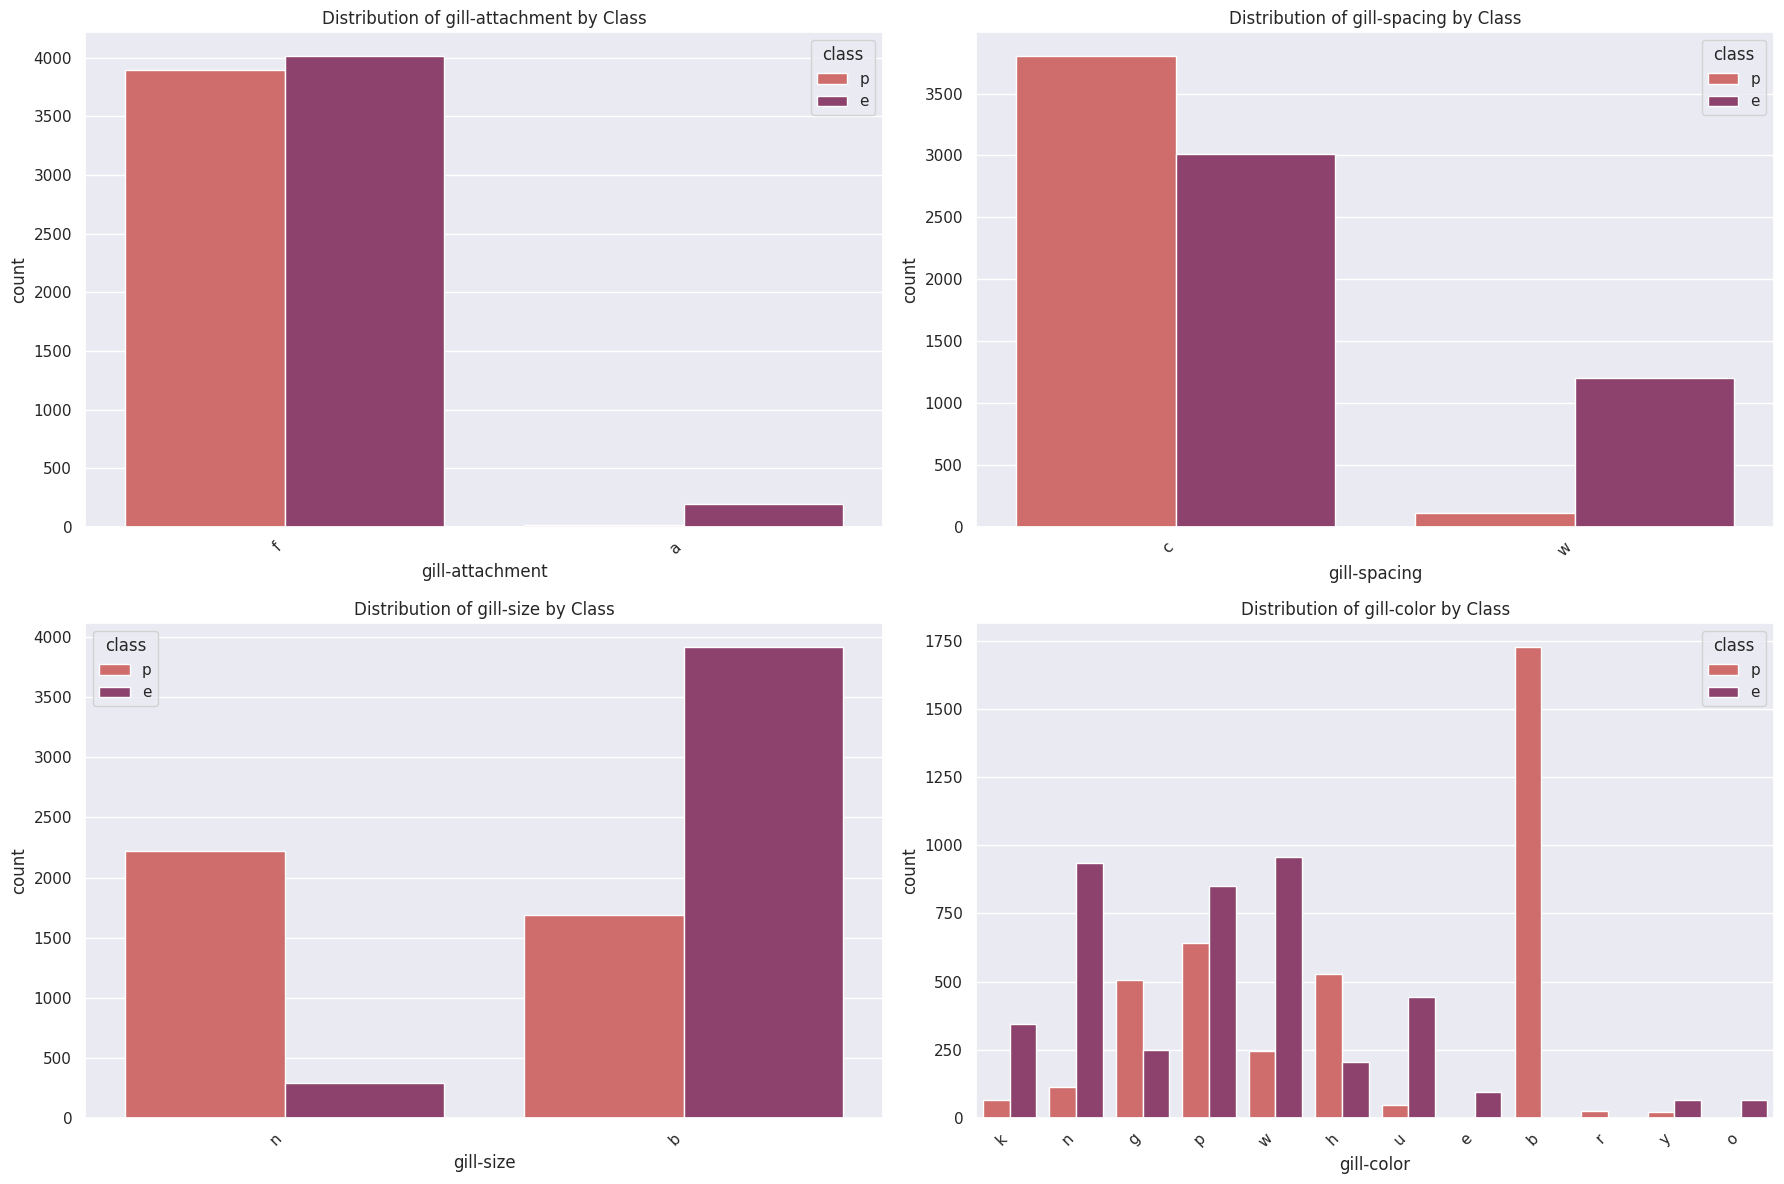

In [40]:
cap_features = ['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']

plt.figure(figsize=(18, 12))

for i, column in enumerate(cap_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=column, hue='class', palette="flare", data=df)
    plt.title(f'Distribution of {column} by Class')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Distribution of mushroom stalk related features.

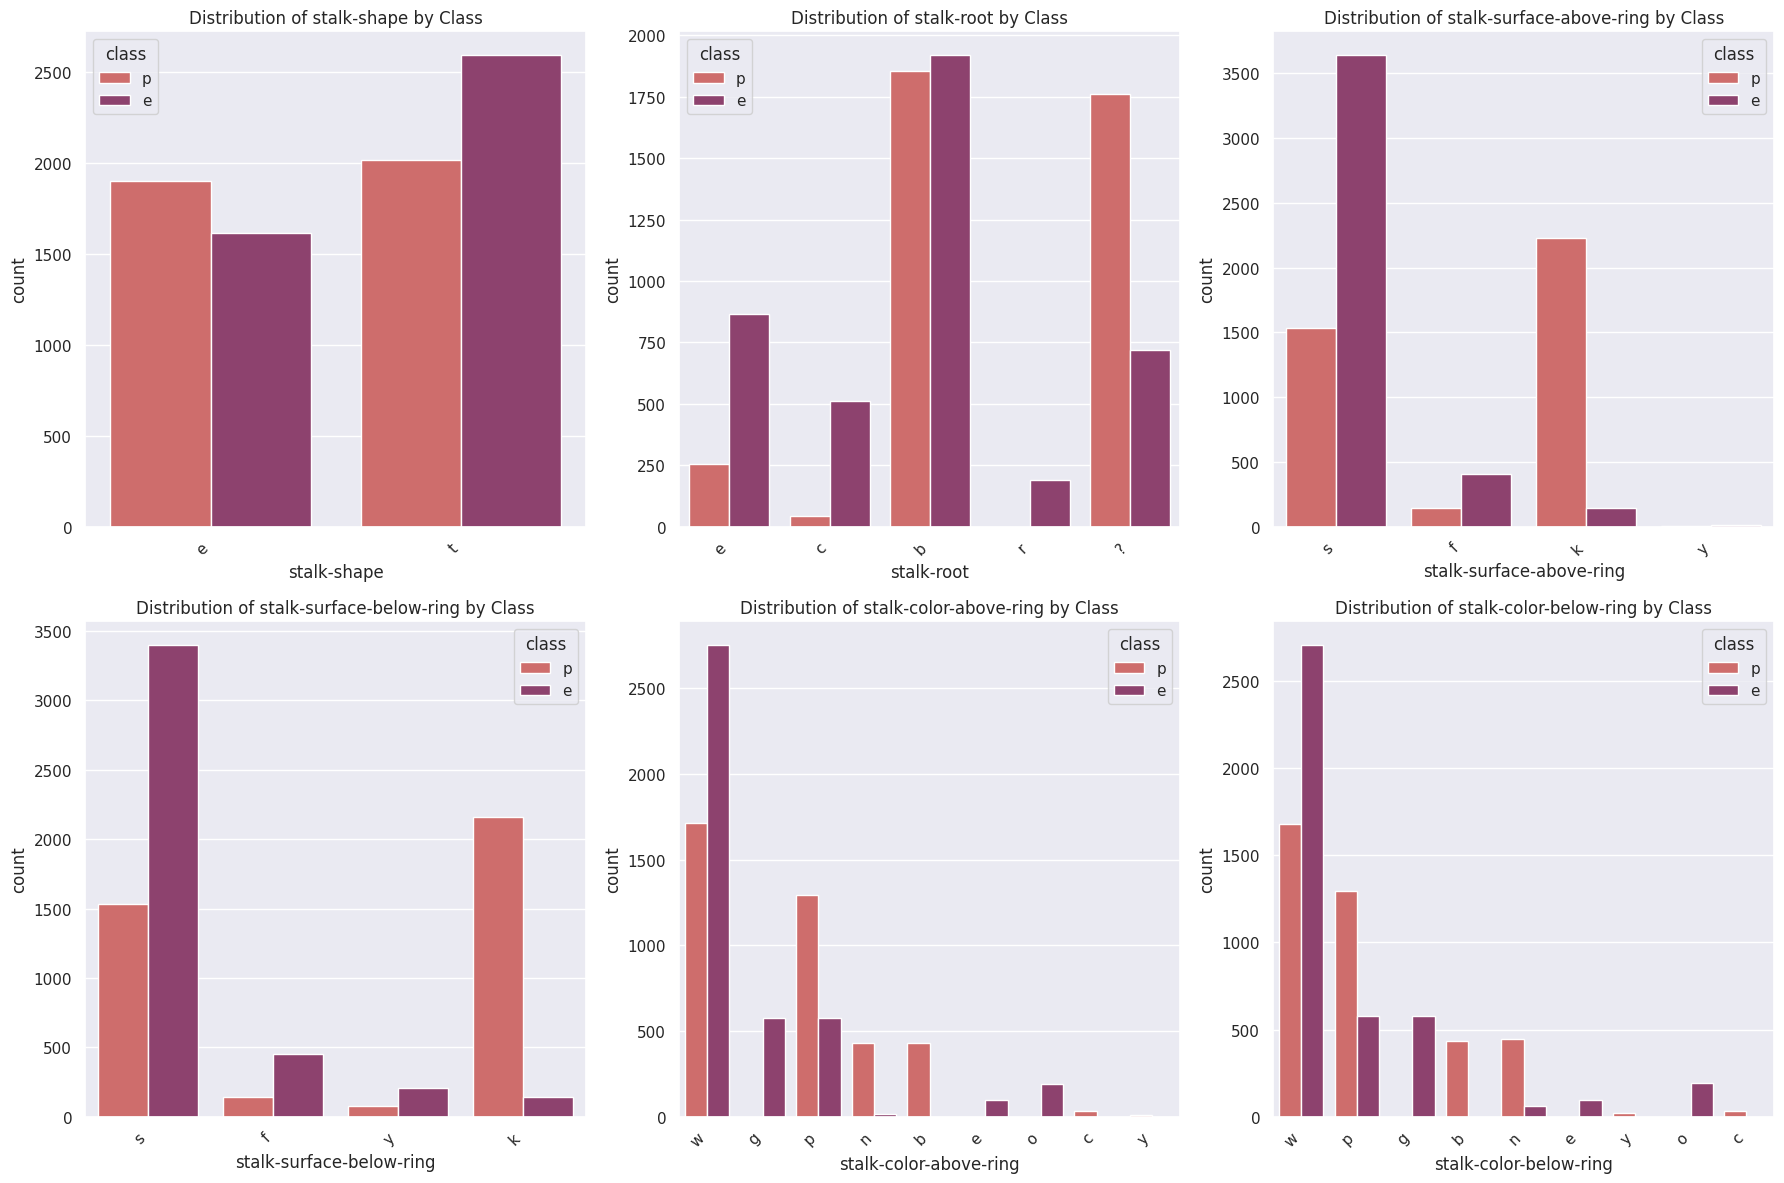

In [41]:
cap_features = ['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring']

plt.figure(figsize=(18, 12))

for i, column in enumerate(cap_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=column, hue='class', palette="flare", data=df)
    plt.title(f'Distribution of {column} by Class')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Distribution of mushroom veil and ring related features.

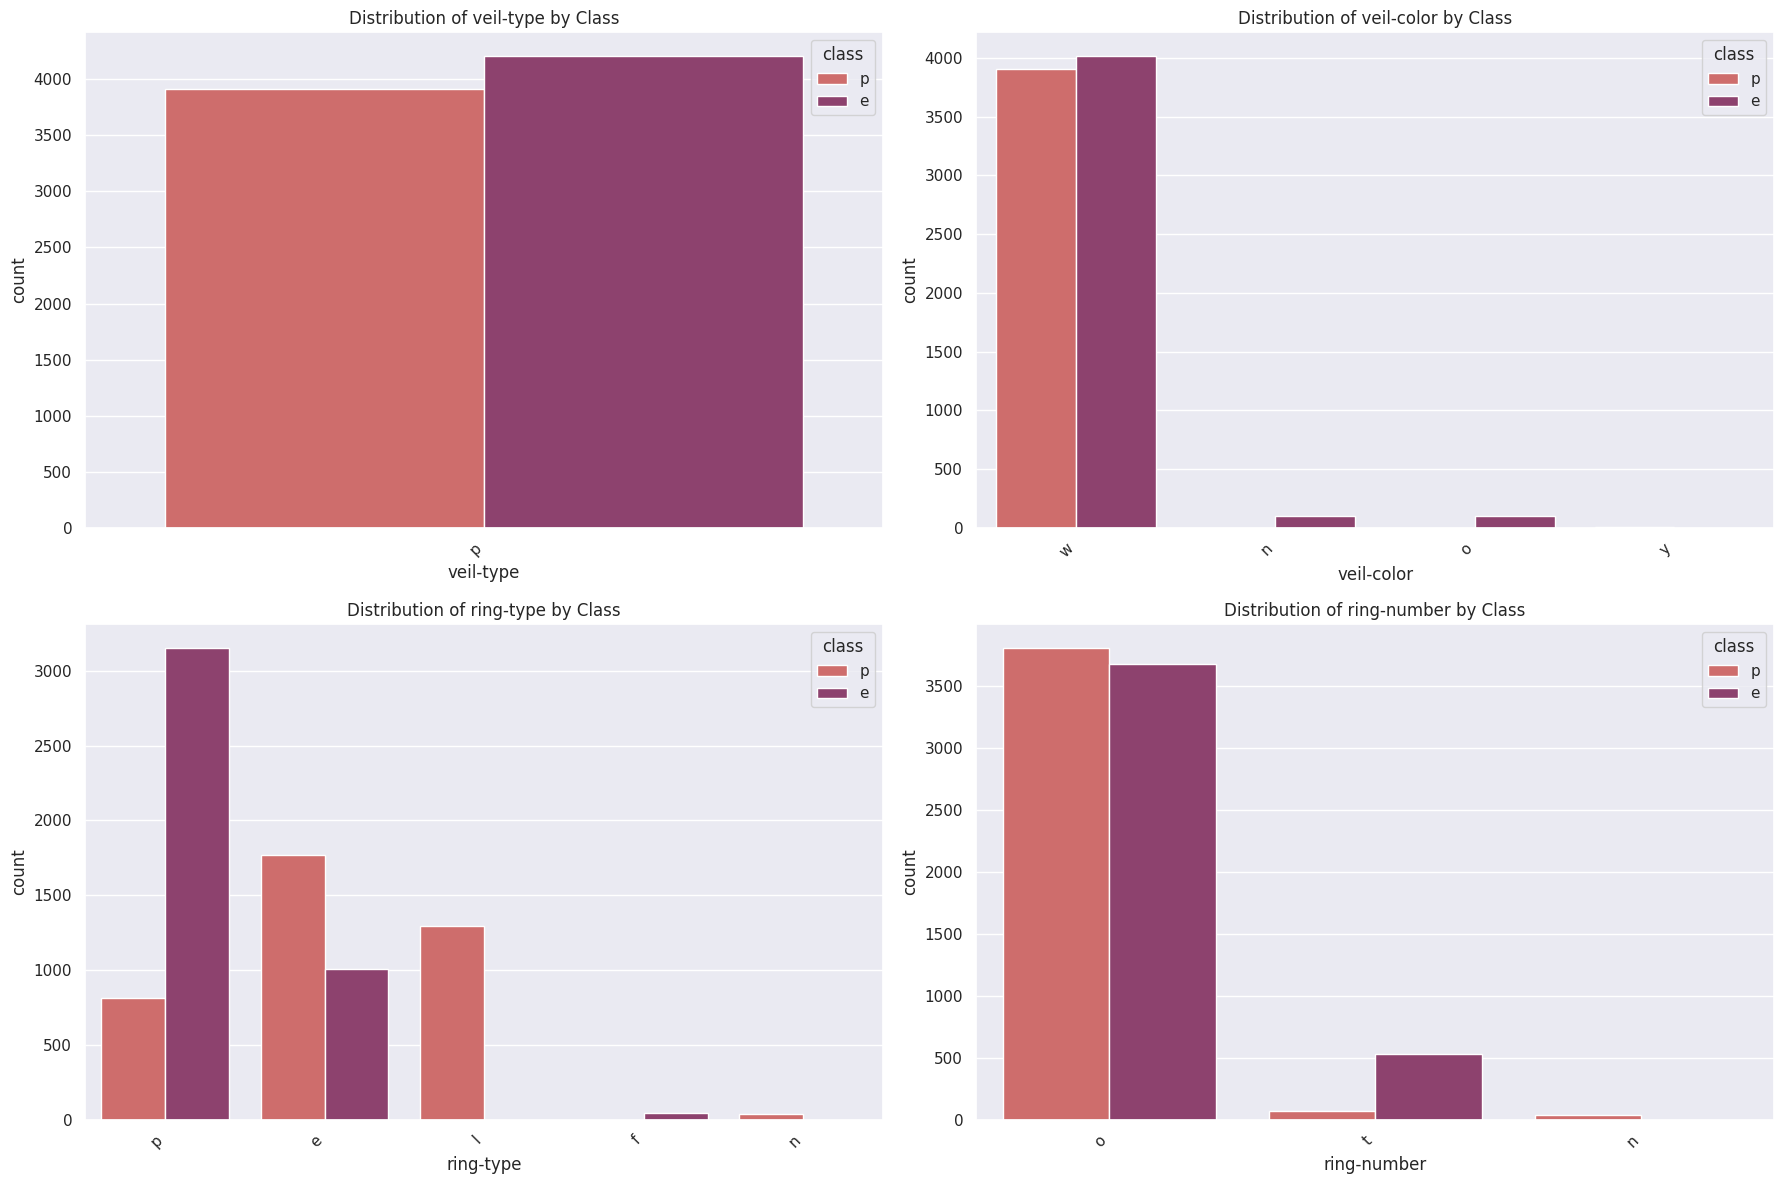

In [42]:
cap_features = ['veil-type', 'veil-color', 'ring-type', 'ring-number']

plt.figure(figsize=(18, 12))

for i, column in enumerate(cap_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=column, hue='class', palette="flare", data=df)
    plt.title(f'Distribution of {column} by Class')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Distribution of spore print color, population and habitat.

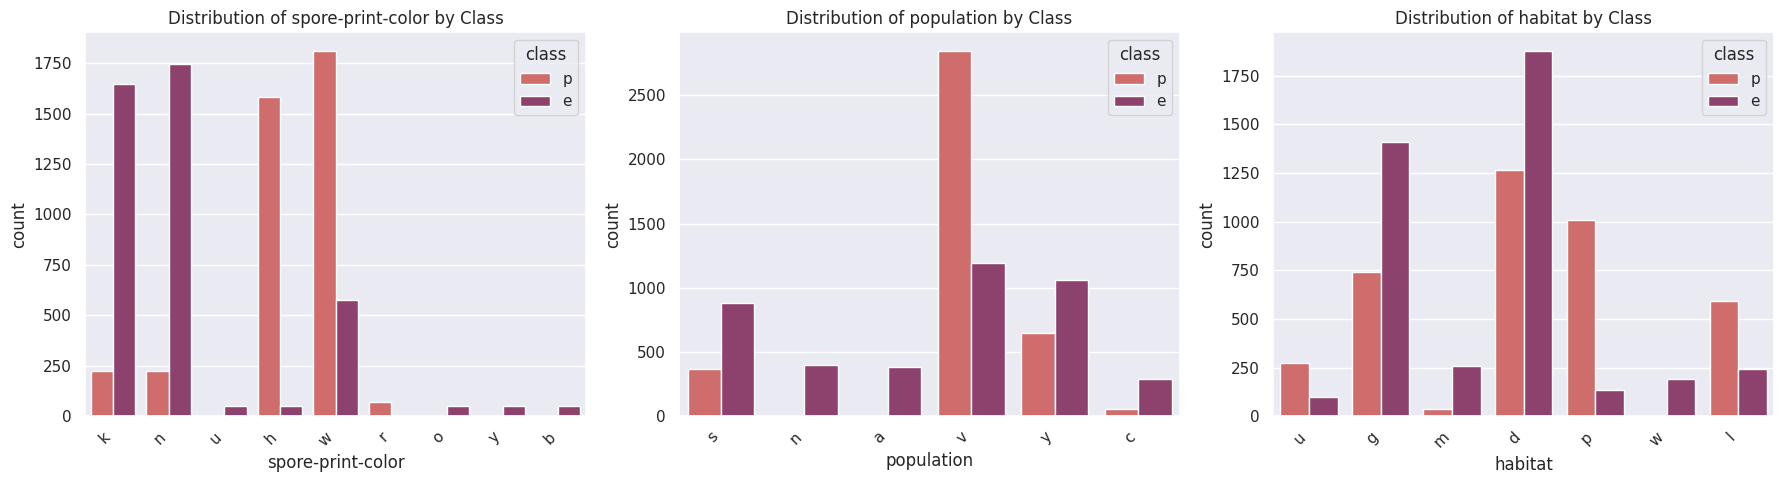

In [43]:
cap_features = ['spore-print-color', 'population', 'habitat']

plt.figure(figsize=(18, 5))

for i, column in enumerate(cap_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=column, hue='class', palette="flare", data=df)
    plt.title(f'Distribution of {column} by Class')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# **2. Data Preprocessing**

    *   Handle missing values (e.g., imputation, dropping rows/columns).
    *   Encode categorical features if necessary
    *   Split the data into training and testing sets.

## Drop redundant columns

- Drop the 'veil-type' column because it has only one unique value.

In [44]:
df.drop('veil-type', axis=1, inplace=True)

In [45]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


## Encode categorical features using One-Hot Encoding

We will encode the features using One-Hot Encoding because the features are not in a specific order.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Apply One-Hot Encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Convert the encoded features back to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X.columns))

In [47]:
X_encoded_df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Encode the target variable using label encoder.

In [48]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable to 0 and 1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## Encode categorical features using Label Encoding

In [96]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a copy of the original X DataFrame for Label Encoding
X_label = X.copy()

# Apply Label Encoding to each categorical column in X_label
for column in X_label.columns:
    X_label[column] = label_encoder.fit_transform(X_label[column])

In [97]:
X_label.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


## Feature Selection

Feature selection by feature scores.

### One-Hot Encoded df

In [49]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with f_classif as the scoring function and k='all' to get scores for all features
selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector to your data using the encoded DataFrame
selector.fit(X_encoded_df, y)

# Get the scores for each feature
feature_scores = selector.scores_

# Create a pandas Series to easily view feature scores with their names
feature_scores_series = pd.Series(feature_scores, index=X_encoded_df.columns)

# Sort the features by their scores in descending order
sorted_feature_scores = feature_scores_series.sort_values(ascending=False)

print("Feature Relevance to target:")
print(sorted_feature_scores)

Feature Relevance to target:
odor_n                        13089.760704
odor_f                         5174.853282
stalk-surface-above-ring_k     4284.482202
stalk-surface-below-ring_k     3981.055542
ring-type_p                    3351.479657
                                  ...     
cap-shape_c                       4.301599
cap-surface_g                     4.301599
cap-shape_f                       2.788489
stalk-root_b                      2.548730
stalk-surface-above-ring_y        2.131663
Length: 116, dtype: float64


There are a lot of features after One-Hot Encoding, so we will plot the first 20 features selected by feature scores.

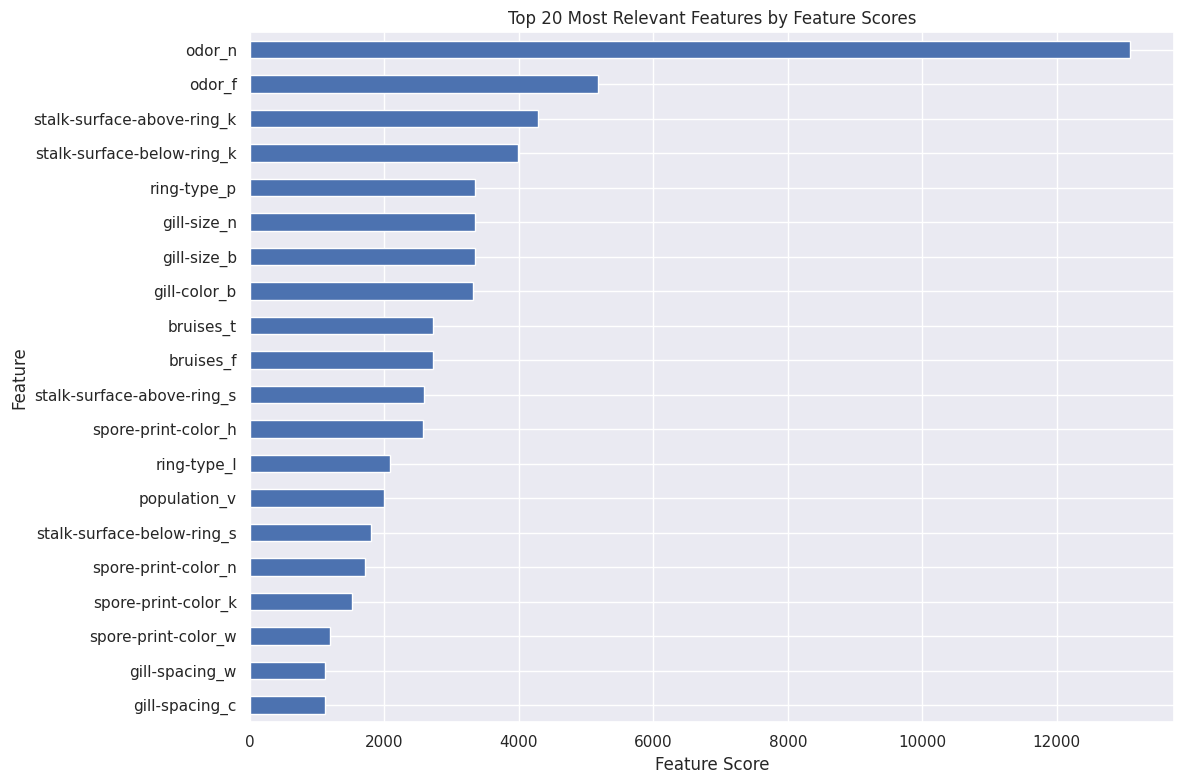

In [50]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with f_classif as the scoring function and k='all' to get scores for all features
selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector to your data using the encoded DataFrame
selector.fit(X_encoded_df, y)

# Get the scores for each feature
feature_scores = selector.scores_

# Create a pandas Series to easily view feature scores with their names
feature_scores_series = pd.Series(feature_scores, index=X_encoded_df.columns)

# Sort the features by their scores in descending order
sorted_feature_scores = feature_scores_series.sort_values(ascending=False)

# Select the top 20 features and sort them in ascending order for plotting
top_20_features = sorted_feature_scores.head(20).sort_values(ascending=True)

# Plot the top 20 features
plt.figure(figsize=(12, 8))
top_20_features.plot(kind='barh')
plt.title('Top 20 Most Relevant Features by Feature Scores')
plt.xlabel('Feature Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Label Encoded df

- Feature selection using the *f_classif* function

In [101]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with f_classif as the scoring function and k='all' to get scores for all features
selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector to your data using the encoded DataFrame
selector.fit(X_label, y)

# Get the scores for each feature
feature_scores = selector.scores_

# Create a pandas Series to easily view feature scores with their names
feature_scores_series = pd.Series(feature_scores, index=X_label.columns)

# Sort the features by their scores in descending order
sorted_feature_scores = feature_scores_series.sort_values(ascending=False)

print("Feature Relevance to target:")
print(sorted_feature_scores)

Feature Relevance to target:
gill-size                   3343.699638
gill-color                  3182.113373
bruises                     2729.509760
ring-type                   1658.306456
stalk-root                  1365.372974
gill-spacing                1121.971850
stalk-surface-above-ring    1023.905195
stalk-surface-below-ring     796.235885
population                   795.562987
habitat                      402.052614
ring-number                  391.207281
cap-surface                  267.135405
spore-print-color            247.490664
stalk-color-above-ring       197.307684
stalk-color-below-ring       178.712480
veil-color                   174.780658
gill-attachment              137.878886
stalk-shape                   85.421860
odor                          71.710619
cap-shape                     22.836184
cap-color                      8.007740
dtype: float64


- Feature selection using the *f_regression* function

In [103]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder

# Encode the target variable numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize SelectKBest with f_regression as the scoring function and k='all' to get scores for all features
selector = SelectKBest(score_func=f_regression, k='all')

# Fit the selector to your data using the encoded DataFrame and the numerically encoded target
selector.fit(X_label, y_encoded)

# Get the scores for each feature
feature_scores = selector.scores_

# Create a pandas Series to easily view feature scores with their names
feature_scores_series = pd.Series(feature_scores, index=X_label.columns)

# Sort the features by their scores in descending order
sorted_feature_scores = feature_scores_series.sort_values(ascending=False)

print("Feature Relevance to target:")
print(sorted_feature_scores)

Feature Relevance to target:
gill-size                   3343.699638
gill-color                  3182.113373
bruises                     2729.509760
ring-type                   1658.306456
stalk-root                  1365.372974
gill-spacing                1121.971850
stalk-surface-above-ring    1023.905195
stalk-surface-below-ring     796.235885
population                   795.562987
habitat                      402.052614
ring-number                  391.207281
cap-surface                  267.135405
spore-print-color            247.490664
stalk-color-above-ring       197.307684
stalk-color-below-ring       178.712480
veil-color                   174.780658
gill-attachment              137.878886
stalk-shape                   85.421860
odor                          71.710619
cap-shape                     22.836184
cap-color                      8.007740
dtype: float64


We observe that for both feature selection functions the first 3 most correlated features are 'gill-size', 'gill-color' and 'bruises'

- Visualise the correlation matrix of features and target

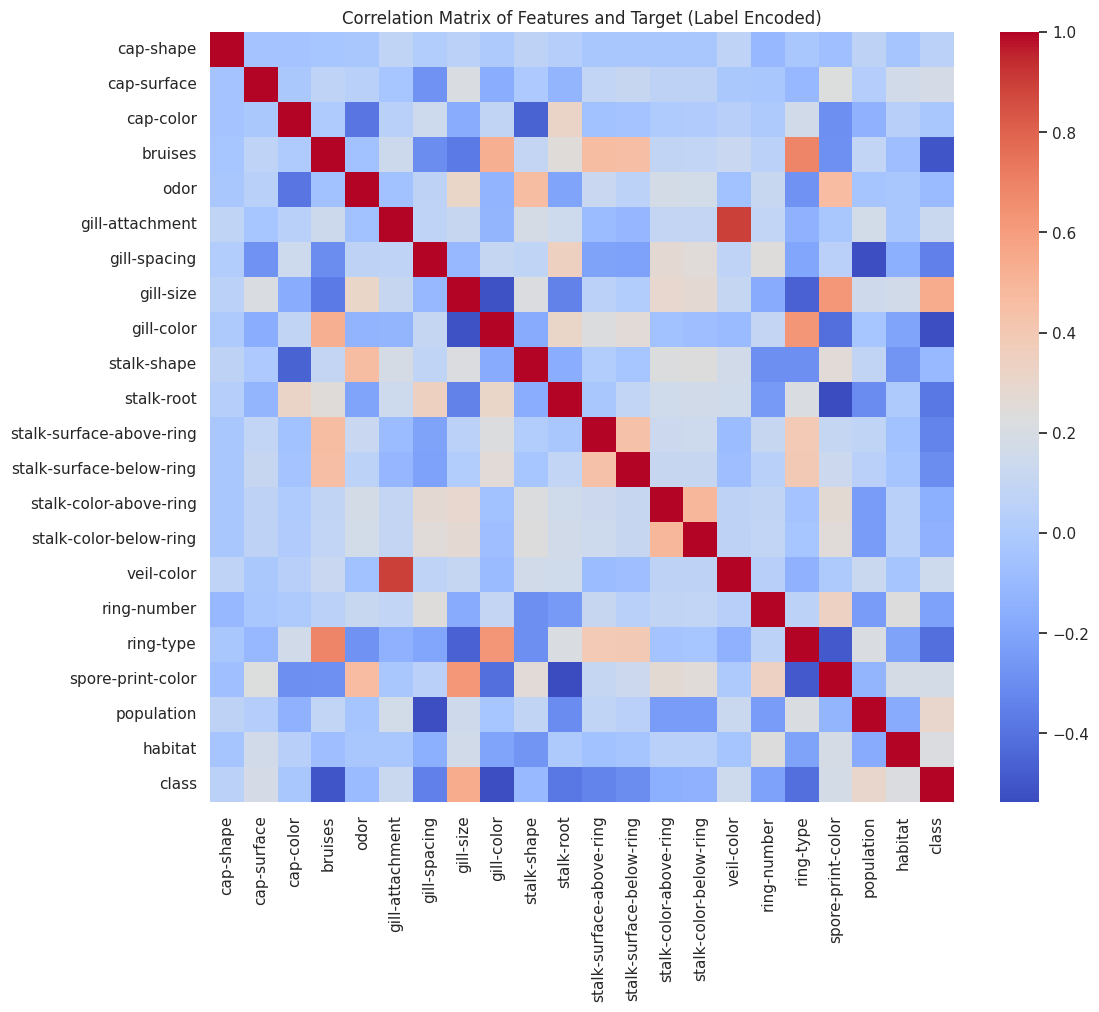

In [104]:
# Combine features (X_label) and the encoded target (y_encoded) into a single DataFrame
# This is needed to calculate the correlation matrix including the target
df_encoded = X_label.copy()
df_encoded['class'] = y_encoded

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Target (Label Encoded)')
plt.show()

## Split the data into training and testing sets

- One-Hot Encoded df

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y_encoded, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6499, 116)
Shape of X_test: (1625, 116)
Shape of y_train: (6499,)
Shape of y_test: (1625,)


- Label Encoded df

In [99]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_label, y_encoded, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6499, 21)
Shape of X_test: (1625, 21)
Shape of y_train: (6499,)
Shape of y_test: (1625,)


# **3. Model Selection and Training:**
    *   Choose at least one appropriate model (e.g., Logistic Regression, SVM, Decision Tree).
    *   Train the selected model(s) on the training data.


Define helper functions for model evaluation.

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, X_test, y_test, model_name, class_names=['Edible', 'Poisonous']):
    """
    Evaluates a classification model by printing a classification report
    and displaying a confusion matrix.
    """
    print(f"\n--- {model_name} Evaluation ---")
    y_pred = model.predict(X_test)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    # Plot the confusion matrix and get the axes object
    ax = disp.plot(cmap=plt.cm.Blues).ax_
    # Turn off the grid lines on the axes
    ax.grid(False)
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()

## Logistic Regression

### Logistic Regression model with all features



In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [55]:
intercept = logistic_model.intercept_[0]
coef = logistic_model.coef_[0][0]

print("Logistic regression model:")
print(f"Intercept: {intercept:.6f}")
print(f"Coefficient: {coef:.6f}")

Logistic regression model:
Intercept: 0.192301
Coefficient: 0.378774


#### **4.1 Model Evaluation LR model**
    *   Evaluate the trained model(s) on the test set using the appropriate metrics: Accuracy, Precision, Recall, F1-score, Confusion Matrix (visualize the confusion matrix), AUC.
    *   Discuss the initial performance based on these metrics.

Visualize the Accuracy of the model.

In [56]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


Visualize the model's Precision, Recall, F1 Score and Confusion Matrix.


--- LR Evaluation ---
Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



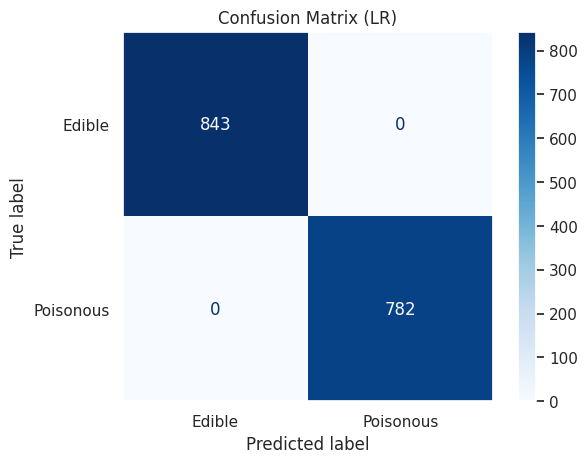

In [57]:
evaluate_model(logistic_model, X_test, y_test, "LR")

Visualize the ROC curve of the model.

AUC: 1.0000


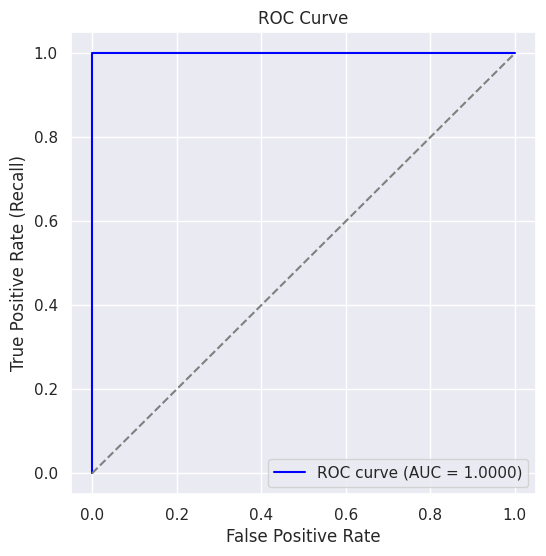

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

logistic_model = SVC(C=1.0, kernel='rbf', probability=True)
logistic_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = logistic_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute AUC
auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line = random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### **5.1 Cross-Validation LR model**
    *   Implement K-Fold Cross-Validation (e.g., with k=5 or 10) on your chosen model and the full dataset.
    *   Calculate and report the mean and standard deviation of the cross-validation scores.
    *   Compare the performance estimate from cross-validation to the initial evaluation on the single test split.

In [115]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Perform 5-fold cross-validation using r2 as the scoring metric on the full dataset
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print the mean and standard deviation
print(f"Mean Cross-validation score: {mean_cv_score:.4f}")
print(f"Standard Deviation of Cross-validation score: {std_cv_score:.4f}")

# Print the accuracy scores for each fold
print("Cross-validation scores for each fold:", cv_scores)

Mean Cross-validation score: 1.0000
Standard Deviation of Cross-validation score: 0.0000
Cross-validation scores for each fold: [1. 1. 1. 1. 1.]


R² on test set: 1.0


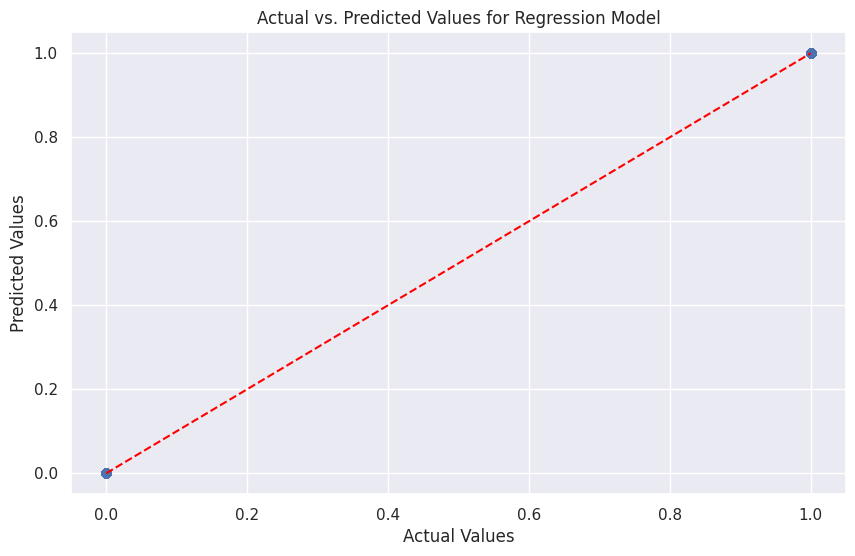

In [117]:
from sklearn.metrics import r2_score

final_model = logistic_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

test_r2 = r2_score(y_test, y_pred)
print("R² on test set:", test_r2)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a diagonal line
# Determine the range for the diagonal line based on the data
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

# Label the axes and add a title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Regression Model')

# Display the plot
plt.show()

### Logistic Regression model with 2 features

#### One-Hot Encoded model

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

selected_features = ['odor_n', 'odor_f']
# Select the subset of features for training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Convert to NumPy arrays to avoid the UserWarning related to feature names
X_train_selected_np = X_train_selected.values
X_test_selected_np = X_test_selected.values


# Logistic regression with a single predictor
logistic_model_2 = LogisticRegression()
logistic_model_2.fit(X_train_selected_np, y_train)

LogisticRegression()

In [82]:
intercept = logistic_model_2.intercept_[0]
coef = logistic_model_2.coef_[0][0]

print("Logistic regression model:")
print(f"Intercept: {intercept:.6f}")
print(f"Coefficient: {coef:.6f}")

Logistic regression model:
Intercept: 0.738411
Coefficient: -4.056199


##### **4.2 Model Evaluation LR model**
    *   Evaluate the trained model(s) on the test set using the appropriate metrics: Accuracy, Precision, Recall, F1-score, Confusion Matrix (visualize the confusion matrix), AUC.
    *   Discuss the initial performance based on these metrics.

Visualize the Accuracy of the model.

In [84]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = logistic_model_2.predict(X_test_selected)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8782


Visualize the model's Precision, Recall, F1 Score and Confusion Matrix.


--- LR Evaluation ---
Classification Report:
              precision    recall  f1-score   support

      Edible       0.96      0.79      0.87       843
   Poisonous       0.81      0.97      0.88       782

    accuracy                           0.88      1625
   macro avg       0.89      0.88      0.88      1625
weighted avg       0.89      0.88      0.88      1625



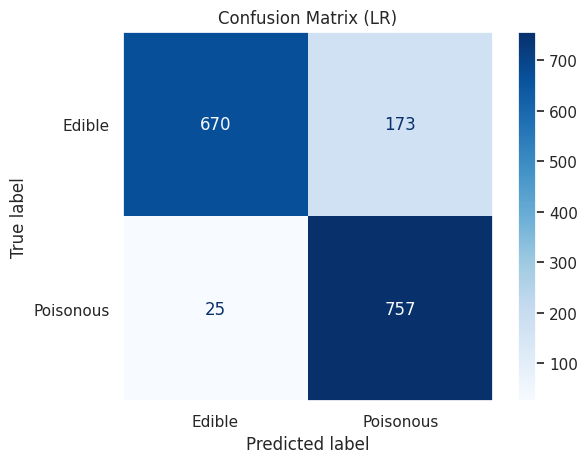

In [85]:
evaluate_model(logistic_model_2, X_test_selected, y_test, "LR")

Visualize the ROC curve of the model.

AUC: 0.8250


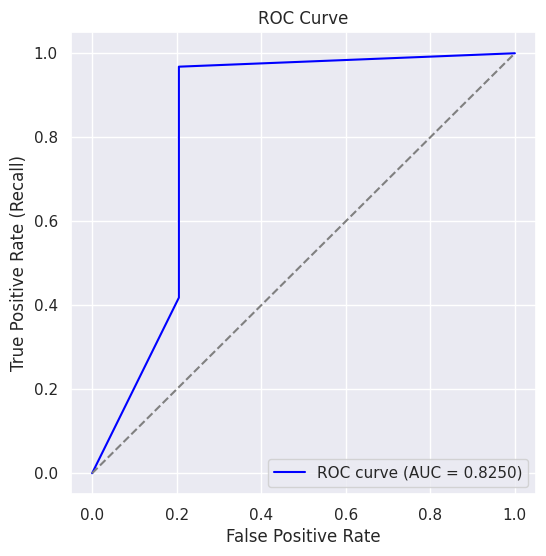

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

logistic_model_2 = SVC(C=1.0, kernel='rbf', probability=True)
logistic_model_2.fit(X_train_selected, y_train)

# Get predicted probabilities for the positive class
y_scores = logistic_model_2.predict_proba(X_test_selected)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute AUC
auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line = random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Visualise the model's decision boundaries.

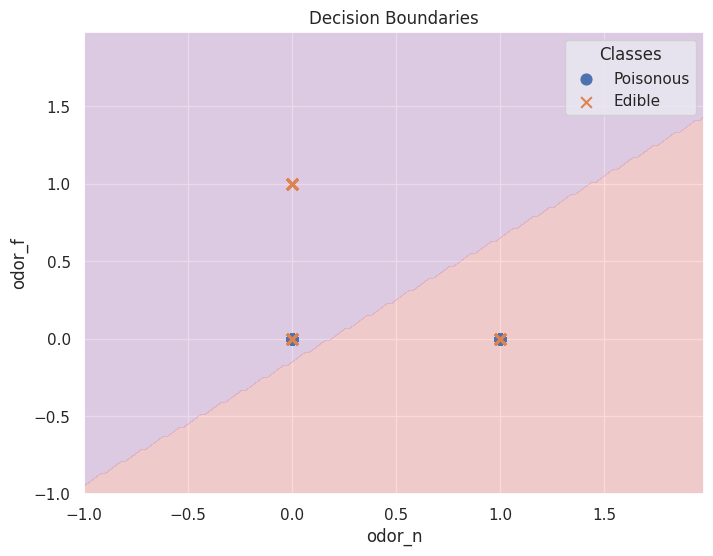

In [105]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundaries(X, y, model, class_labels=None):
  n_classes = len(np.unique(y))

  # Convert X to a NumPy array if it's a pandas DataFrame
  if isinstance(X, pd.DataFrame):
      X = X.values

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                      np.arange(y_min, y_max, 0.02))

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, Z, alpha=0.3,
                 levels=np.arange(n_classes+1)-0.5,  # center boundaries between class labels
                 cmap=plt.cm.Set3)
  markers = ['o', 'x', '*', 's', 'D']

  if class_labels is None:
    class_labels = [f"Class {i}" for i in range(n_classes)]

  # Plot points
  for i, marker in zip(range(n_classes), markers * ((n_classes // len(markers)) + 1)):
      plt.scatter(X[y == i, 0], X[y == i, 1], marker=marker, s=60, label=class_labels[i]) # Removed edgecolor='k'

  plt.legend(title="Classes")
  plt.title("Decision Boundaries")
  plt.xlabel("odor_n")
  plt.ylabel("odor_f")
  plt.show()

plot_decision_boundaries(X_test_selected, y_test, logistic_model_2, class_labels=["Poisonous", "Edible"])

#### Label Encoded model

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

selected_features = ['gill-size', 'gill-color']
# Select the subset of features for training and testing
X_train_selected = X_train_l[selected_features]
X_test_selected = X_test_l[selected_features]

# Convert to NumPy arrays to avoid the UserWarning related to feature names
X_train_selected_np = X_train_selected.values
X_test_selected_np = X_test_selected.values

# Logistic regression with a single predictor
logistic_model_2 = LogisticRegression()
logistic_model_2.fit(X_train_selected_np, y_train_l)

LogisticRegression()

In [107]:
intercept = logistic_model_2.intercept_[0]
coef = logistic_model_2.coef_[0][0]

print("Logistic regression model:")
print(f"Intercept: {intercept:.6f}")
print(f"Coefficient: {coef:.6f}")

Logistic regression model:
Intercept: 0.752126
Coefficient: 2.337729


##### **4.3 Model Evaluation LR model**
    *   Evaluate the trained model(s) on the test set using the appropriate metrics: Accuracy, Precision, Recall, F1-score, Confusion Matrix (visualize the confusion matrix), AUC.
    *   Discuss the initial performance based on these metrics.

Visualise the accuracy of the model.

In [110]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = logistic_model_2.predict(X_test_selected.values)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test_l, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7680


Visualize the model's Precision, Recall, F1 Score and Confusion Matrix.


--- LR Evaluation ---
Classification Report:
              precision    recall  f1-score   support

      Edible       0.74      0.85      0.79       843
   Poisonous       0.81      0.68      0.74       782

    accuracy                           0.77      1625
   macro avg       0.77      0.76      0.77      1625
weighted avg       0.77      0.77      0.77      1625



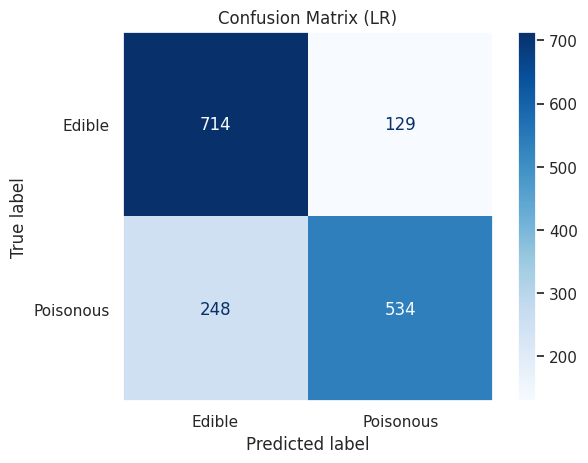

In [111]:
evaluate_model(logistic_model_2, X_test_selected.values, y_test_l, "LR")

Visualise the ROC curve of the model.

AUC: 0.8204


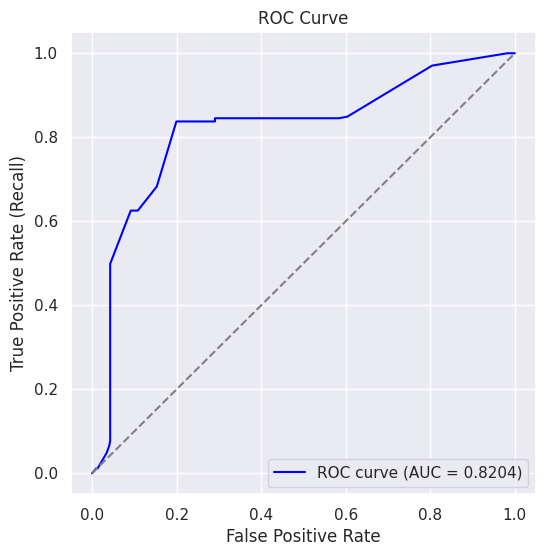

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

logistic_model_2 = SVC(C=1.0, kernel='rbf', probability=True)
logistic_model_2.fit(X_train_selected.values, y_train_l)

# Get predicted probabilities for the positive class
y_scores = logistic_model_2.predict_proba(X_test_selected.values)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_l, y_scores)

# Compute AUC
auc = roc_auc_score(y_test_l, y_scores)
print(f"AUC: {auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line = random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Visualise the model's decision boundaries.

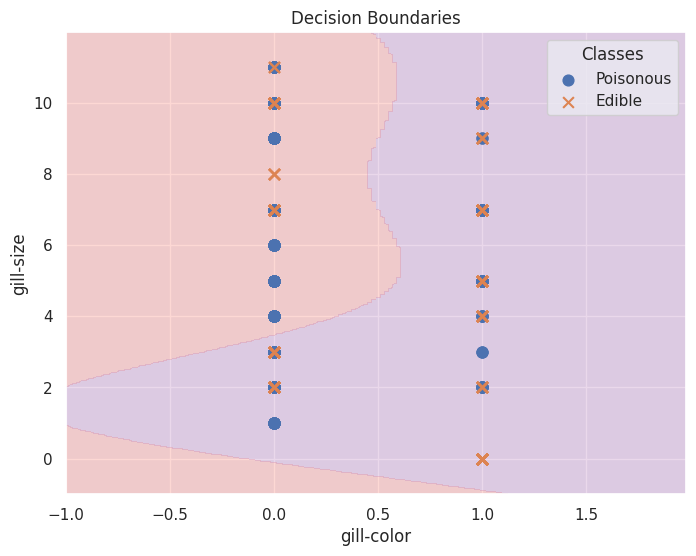

In [114]:
def plot_decision_boundaries(X, y, model, class_labels=None):
  n_classes = len(np.unique(y))

  # Convert X to a NumPy array if it's a pandas DataFrame
  if isinstance(X, pd.DataFrame):
      X = X.values

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                      np.arange(y_min, y_max, 0.02))

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, Z, alpha=0.3,
                 levels=np.arange(n_classes+1)-0.5,  # center boundaries between class labels
                 cmap=plt.cm.Set3)
  markers = ['o', 'x', '*', 's', 'D']

  if class_labels is None:
    class_labels = [f"Class {i}" for i in range(n_classes)]

  # Plot points
  for i, marker in zip(range(n_classes), markers * ((n_classes // len(markers)) + 1)):
      plt.scatter(X[y == i, 0], X[y == i, 1], marker=marker, s=60, label=class_labels[i]) # Removed edgecolor='k'

  plt.legend(title="Classes")
  plt.title("Decision Boundaries")
  plt.xlabel("gill-color")
  plt.ylabel("gill-size")
  plt.show()

plot_decision_boundaries(X_test_selected, y_test_l, logistic_model_2, class_labels=["Poisonous", "Edible"])

#### **Conclusion**
- We tried to use a One-Hot Encoded and a Label Encoded model trained with only 2 features to be able to visualise the decision boundaries and to compare the models.
- The One-Hot Encoded model has a better performance than the Label Encoded model, so going forward we will only use the One-Hot Encoded model.

## Decision Tree

### Decision Tree model with all features



In [61]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create and fit the decision tree
# We'll use a max_depth of 5 for a balance between performance and interpretability
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

#### **4.4 Model Evaluation DT model**
    *   Evaluate the trained model(s) on the test set using the appropriate metrics: Accuracy, Precision, Recall, F1-score, Confusion Matrix (visualize the confusion matrix), AUC.
    *   Discuss the initial performance based on these metrics.

Visualise the model's accuracy.

In [63]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


Visualize the model's Precision, Recall, F1 Score and Confusion Matrix.


--- Decision Tree (max depth = 5) Evaluation ---
Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



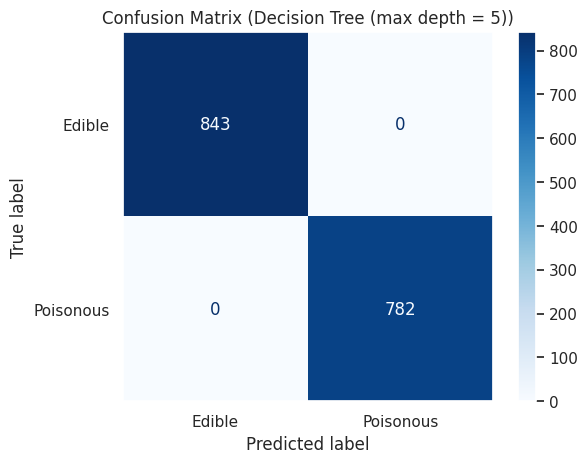

In [62]:
evaluate_model(dt_model, X_test, y_test, "Decision Tree (max depth = 5)", class_names=['Edible', 'Poisonous'])

Visualise the ROC curve of the model.

AUC: 1.0000


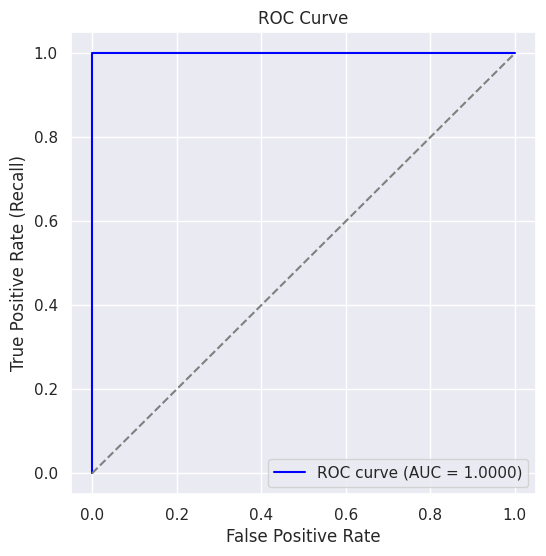

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

dt_model = SVC(C=1.0, kernel='rbf', probability=True)
dt_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute AUC
auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line = random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### **5.2 Cross-Validation DT model**
    *   Implement K-Fold Cross-Validation (e.g., with k=5 or 10) on your chosen model and the full dataset.
    *   Calculate and report the mean and standard deviation of the cross-validation scores.
    *   Compare the performance estimate from cross-validation to the initial evaluation on the single test split.

In [118]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Perform 5-fold cross-validation using r2 as the scoring metric on the full dataset
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print the mean and standard deviation
print(f"Mean Cross-validation score: {mean_cv_score:.4f}")
print(f"Standard Deviation of Cross-validation score: {std_cv_score:.4f}")

# Print the accuracy scores for each fold
print("Cross-validation scores for each fold:", cv_scores)

Mean Cross-validation score: 1.0000
Standard Deviation of Cross-validation score: 0.0000
Cross-validation scores for each fold: [1. 1. 1. 1. 1.]


R² on test set: 1.0


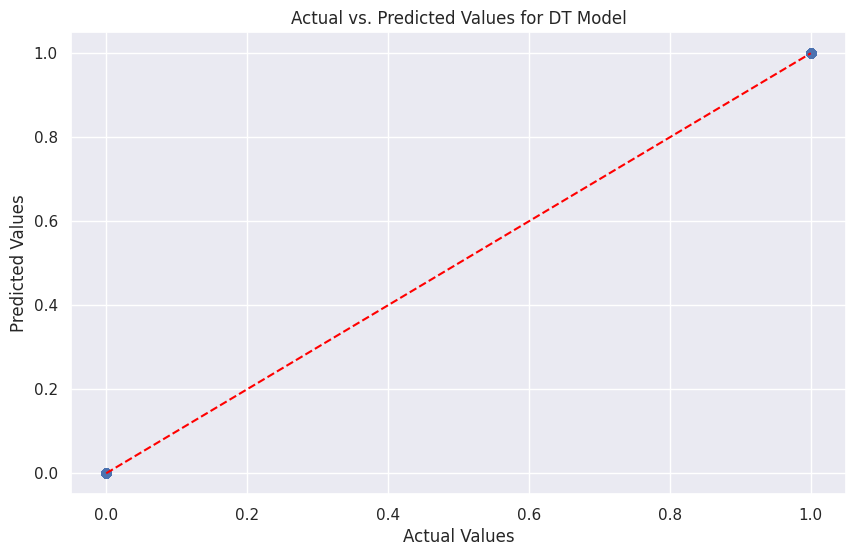

In [119]:
from sklearn.metrics import r2_score

final_model = dt_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

test_r2 = r2_score(y_test, y_pred)
print("R² on test set:", test_r2)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a diagonal line
# Determine the range for the diagonal line based on the data
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

# Label the axes and add a title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for DT Model')

# Display the plot
plt.show()

## Random Forest

### Random model with all features



In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
# Create and fit random forest
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42,
    max_depth=None,        # Let trees grow fully
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True         # Use bootstrap sampling
)

# We'll reuse the same train/test split from the decision tree
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### **4.5 Model Evaluation Random Forest model**
    *   Evaluate the trained model(s) on the test set using the appropriate metrics: Accuracy, Precision, Recall, F1-score, Confusion Matrix (visualize the confusion matrix), AUC.
    *   Discuss the initial performance based on these metrics.

Visualize the model's accuracy.

In [67]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


Visualize the model's Precision, Recall, F1 Score and Confusion Matrix.


--- Random Forest Evaluation ---
Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



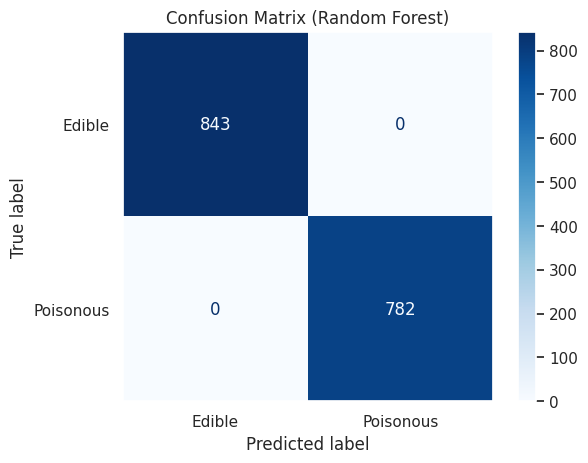

In [76]:
evaluate_model(rf_model, X_test, y_test, "Random Forest", class_names=['Edible', 'Poisonous'])

Visualize the ROC curve of the model.

AUC: 1.0000


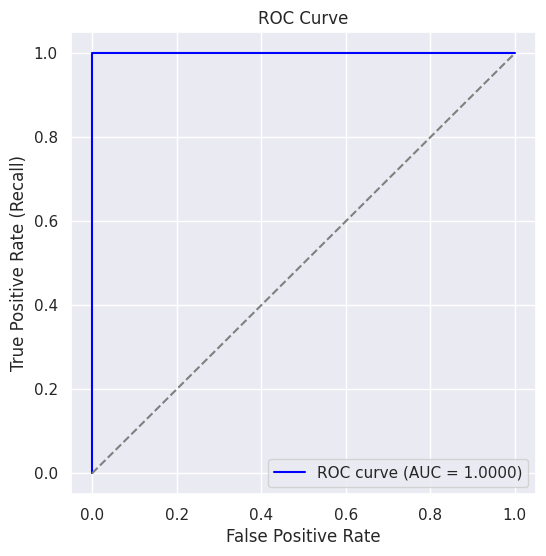

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

rf_model = SVC(C=1.0, kernel='rbf', probability=True)
rf_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute AUC
auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line = random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### **5.3 Cross-Validation RF model**
    *   Implement K-Fold Cross-Validation (e.g., with k=5 or 10) on your chosen model and the full dataset.
    *   Calculate and report the mean and standard deviation of the cross-validation scores.
    *   Compare the performance estimate from cross-validation to the initial evaluation on the single test split.

In [124]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Perform 5-fold cross-validation using r2 as the scoring metric on the full dataset
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print the mean and standard deviation
print(f"Mean Cross-validation score: {mean_cv_score:.4f}")
print(f"Standard Deviation of Cross-validation score: {std_cv_score:.4f}")

# Print the accuracy scores for each fold
print("Cross-validation scores for each fold:", cv_scores)

Mean Cross-validation score: 1.0000
Standard Deviation of Cross-validation score: 0.0000
Cross-validation scores for each fold: [1. 1. 1. 1. 1.]


R² on test set: 1.0


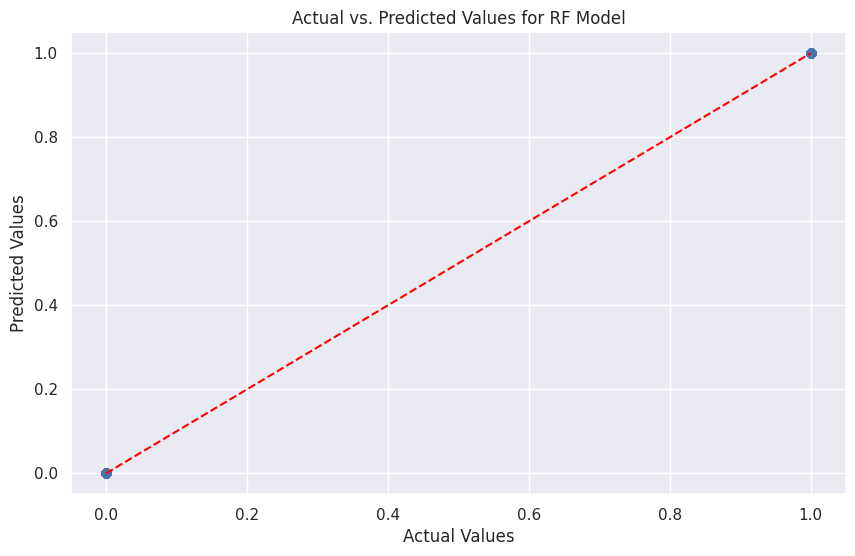

In [129]:
from sklearn.metrics import r2_score

final_model = rf_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

test_r2 = r2_score(y_test, y_pred)
print("R² on test set:", test_r2)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a diagonal line
# Determine the range for the diagonal line based on the data
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

# Label the axes and add a title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for RF Model')

# Display the plot
plt.show()

## SVMs

### SVM model with all features



In [73]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# SVMs are sensitive to feature scales, so we'll standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames with feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# We'll use the RBF kernel, which is a good default
svm_model = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

#### **4.6 Model Evaluation SVM model**
    *   Evaluate the trained model(s) on the test set using the appropriate metrics: Accuracy, Precision, Recall, F1-score, Confusion Matrix (visualize the confusion matrix), AUC.
    *   Discuss the initial performance based on these metrics.

Visualize the model's accuracy.

In [74]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9846


Visualize the model's Precision, Recall, F1 Score and Confusion Matrix.


--- SVM Evaluation ---
Classification Report:
              precision    recall  f1-score   support

      Edible       0.98      0.99      0.99       843
   Poisonous       0.99      0.98      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



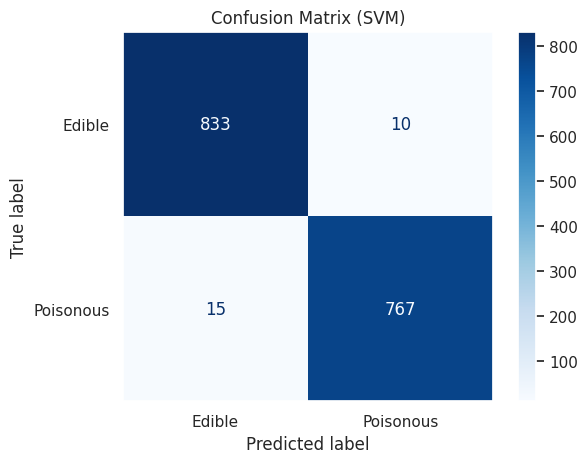

In [75]:
evaluate_model(svm_model, X_test, y_test, "SVM", class_names=['Edible', 'Poisonous'])

Visualize the ROC curve of the model.

AUC: 1.0000


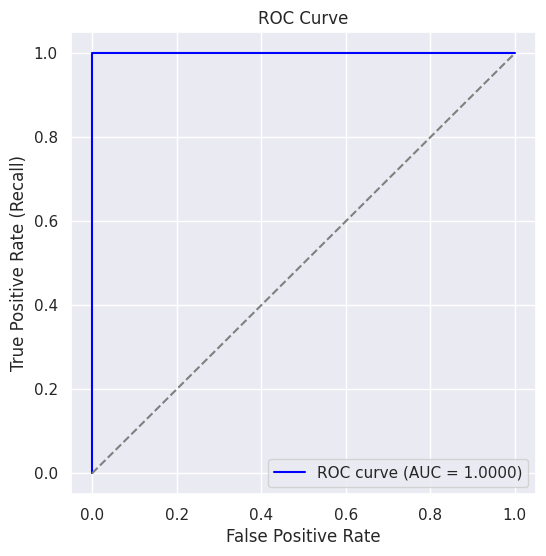

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

svm_model = SVC(C=1.0, kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute AUC
auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line = random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### **5.4 Cross-Validation DT model**
    *   Implement K-Fold Cross-Validation (e.g., with k=5 or 10) on your chosen model and the full dataset.
    *   Calculate and report the mean and standard deviation of the cross-validation scores.
    *   Compare the performance estimate from cross-validation to the initial evaluation on the single test split.

In [126]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Perform 5-fold cross-validation using r2 as the scoring metric on the full dataset
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print the mean and standard deviation
print(f"Mean Cross-validation score: {mean_cv_score:.4f}")
print(f"Standard Deviation of Cross-validation score: {std_cv_score:.4f}")

# Print the accuracy scores for each fold
print("Cross-validation scores for each fold:", cv_scores)

Mean Cross-validation score: 1.0000
Standard Deviation of Cross-validation score: 0.0000
Cross-validation scores for each fold: [1. 1. 1. 1. 1.]


R² on test set: 1.0


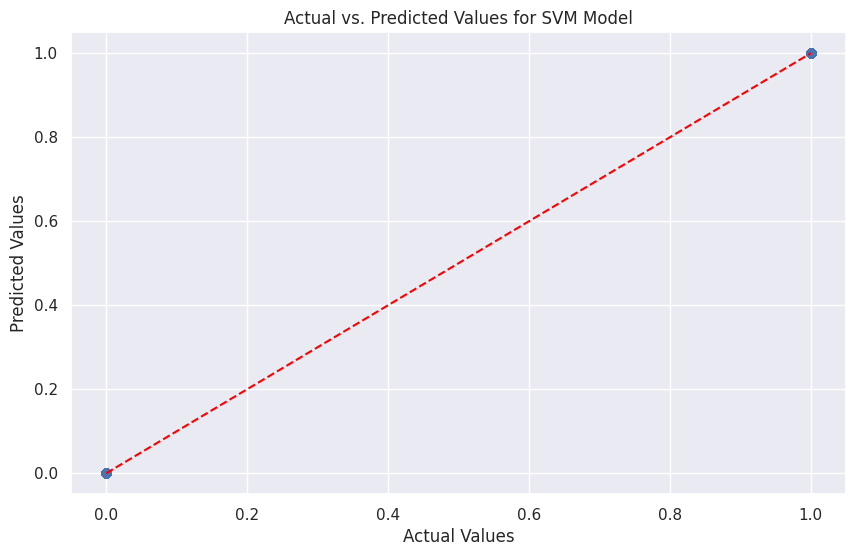

In [128]:
from sklearn.metrics import r2_score

final_model = svm_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

test_r2 = r2_score(y_test, y_pred)
print("R² on test set:", test_r2)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a diagonal line
# Determine the range for the diagonal line based on the data
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

# Label the axes and add a title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for SVM Model')

# Display the plot
plt.show()

# **6. Interpretation and Conclusion:**
    *   Summarize your findings. What do the evaluation metrics tell you about your model's performance?
    *   Discuss any challenges encountered and potential next steps (e.g., feature engineering, trying different models, hyperparameter tuning).

**Model Performance (Initial Evaluation on Test Set - One-Hot Encoded Data):**

*   **Logistic Regression (All Features):** We achieved perfect scores across all metrics (Accuracy, Precision, Recall, F1-score, AUC of 1.0000), and a perfect R² of 1.0 on the test set. The confusion matrix shows no misclassifications.
*   **Decision Tree (Max Depth = 5, All Features):** We achieved perfect scores across all metrics (Accuracy, Precision, Recall, F1-score, AUC of 1.0000), and a perfect R² of 1.0 on the test set. The confusion matrix shows no misclassifications.
*   **Random Forest (All Features):** Also achieved perfect scores across all metrics (Accuracy, Precision, Recall, F1-score, AUC of 1.0000), and a perfect R² of 1.0 on the test set. The confusion matrix shows no misclassifications.
*   **SVM (All Features):** Achieved very high scores, with Accuracy, Precision, Recall, F1-score, and AUC of 1.0000, and a perfect R² of 1.0 on the test set. The confusion matrix shows few misclassifications.

**Model Performance (Initial Evaluation on Test Set - Label Encoded Data):**

*   **Logistic Regression (Selected Features: 'gill-size', 'gill-color'):** Achieved an Accuracy of 0.7680, with varying Precision, Recall, and F1-scores for each class. The AUC was 0.8204. The confusion matrix shows a significant number of misclassifications compared to the models trained on all features.

**Cross-Validation Results (One-Hot Encoded Data):**

*   **Logistic Regression (All Features):** Mean Cross-validation score (R²) was 1.0000 with a standard deviation of 0.0000.
*   **Decision Tree (All Features):** Mean Cross-validation score (R²) was 1.0000 with a standard deviation of 0.0000.
*   **Random Forest (All Features):** Mean Cross-validation score (R²) was 1.0000 with a standard deviation of 0.0000.
*    **SVM (All Features):** Mean Cross-validation score (R²) was 1.0000 with a standard deviation of 0.0000.

**Conclusion:**

*   The models trained on all features (Logistic Regression, Decision Tree, Random Forest, and SVM) achieved exceptionally high, often perfect, performance metrics on both the initial test set evaluation and during cross-validation. This suggests that the dataset is highly separable, and these models are capable of perfectly distinguishing between edible and poisonous mushrooms based on the provided features when using the One-Hot Encoded data.
*   The Logistic Regression model trained on only two Label Encoded features ('gill-size' and 'gill-color') showed significantly lower performance compared to the models using all features. This proves that Label Encoding is not as effective as One-Hot Encoding for all features in this case, especially when dealing with features with multiple categories where the numerical ordering introduced by Label Encoding is arbitrary.

**Potential Next Steps:**

* Generate some syntethic data and use it to try to build one model and visualise its evaluation metrics.

# Build and evaluate a Logistic Regression Model using synthetic data

We want to generate synthetic data, add it to the existing DataFrame, train a logistic regression model on the combined data, and visualize its performance metrics.

## Generate synthetic data


Create synthetic data that resembles the structure of the original data by sampling from the unique values of each column in the original DataFrame.



In [130]:
# Set a random state for reproducibility
np.random.seed(42)

# Define the number of synthetic data points to generate
num_synthetic_samples = 2000

# Create an empty DataFrame with the same columns as the original DataFrame
synthetic_df = pd.DataFrame(columns=df.columns)

# Generate synthetic data for each column by sampling from the unique values of the original column
for col in df.columns:
    unique_values = df[col].unique()
    synthetic_df[col] = np.random.choice(unique_values, size=num_synthetic_samples)

# Display the first few rows of the synthetic DataFrame
display(synthetic_df.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,f,y,f,m,f,w,b,e,...,y,f,g,p,n,o,f,h,s,w
1,e,c,g,u,f,p,f,w,n,y,...,y,y,o,o,y,o,f,w,v,u
2,p,s,g,c,f,f,a,w,n,p,...,f,s,b,p,y,n,l,y,s,m
3,p,k,g,g,f,l,f,c,n,g,...,f,y,e,o,o,t,n,k,c,g
4,p,x,s,u,f,c,f,c,n,k,...,y,s,e,y,w,t,p,r,y,u


## Combine data



Concatenate the original and synthetic DataFrames.

In [131]:
# Concatenate the original and synthetic DataFrames
df_combined = pd.concat([df, synthetic_df], ignore_index=True)

# Display the first few rows of the combined DataFrame
display(df_combined.head())

# Display the shape of the combined DataFrame
print("\nShape of the combined DataFrame:", df_combined.shape)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g



Shape of the combined DataFrame: (10124, 22)


## Preprocess Combined Data


Separate features and target variable in the combined DataFrame and apply One-Hot Encoding to the categorical features, and Label Encoding to the target variable, as we did for the original data.

In [132]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Separate features (X_combined) and target (y_combined) from the combined DataFrame
X_combined = df_combined.drop('class', axis=1)
y_combined = df_combined['class']

# Apply One-Hot Encoding to categorical features in the combined features DataFrame
encoder_combined = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_combined_encoded = encoder_combined.fit_transform(X_combined)

# Convert the encoded features back to a DataFrame with proper column names
X_combined_encoded_df = pd.DataFrame(X_combined_encoded, columns=encoder_combined.get_feature_names_out(X_combined.columns))

# Encode the target variable to 0 and 1
label_encoder_combined = LabelEncoder()
y_combined_encoded = label_encoder_combined.fit_transform(y_combined)

print("Shape of the combined encoded features DataFrame:", X_combined_encoded_df.shape)
print("Shape of the combined encoded target variable:", y_combined_encoded.shape)

Shape of the combined encoded features DataFrame: (10124, 116)
Shape of the combined encoded target variable: (10124,)


## Split the combined data into training and testing sets



In [133]:
from sklearn.model_selection import train_test_split

# Split the combined encoded data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined_encoded_df, y_combined_encoded, test_size=0.2, random_state=42
)

print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of X_test_combined:", X_test_combined.shape)
print("Shape of y_train_combined:", y_train_combined.shape)
print("Shape of y_test_combined:", y_test_combined.shape)

Shape of X_train_combined: (8099, 116)
Shape of X_test_combined: (2025, 116)
Shape of y_train_combined: (8099,)
Shape of y_test_combined: (2025,)


## Train the Logistic Regression Model


In [134]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logistic_model_combined = LogisticRegression(random_state=42)

# Train the model on the combined training data
logistic_model_combined.fit(X_train_combined, y_train_combined)

print("Logistic Regression model trained on combined data.")

Logistic Regression model trained on combined data.


## Evaluate the Logistic Regression Model on Combined Data


Visualize the model's accuracy.

In [136]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = logistic_model_combined.predict(X_test_combined)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test_combined, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8943


Visualize the model's Precision, Recall, F1 Score and Confusion Matrix.


--- Logistic Regression (Combined Data) Evaluation ---
Classification Report:
              precision    recall  f1-score   support

      Edible       0.90      0.90      0.90      1047
   Poisonous       0.89      0.89      0.89       978

    accuracy                           0.89      2025
   macro avg       0.89      0.89      0.89      2025
weighted avg       0.89      0.89      0.89      2025



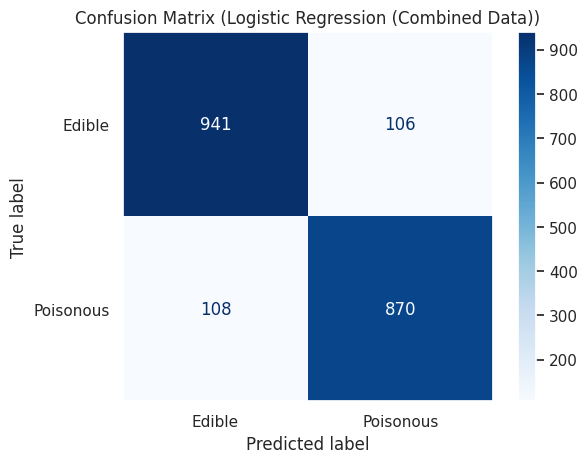

In [137]:
# Evaluate the model using the helper function
evaluate_model(logistic_model_combined, X_test_combined, y_test_combined, "Logistic Regression (Combined Data)")

Visualize the ROC curve of the model.

AUC: 0.9790


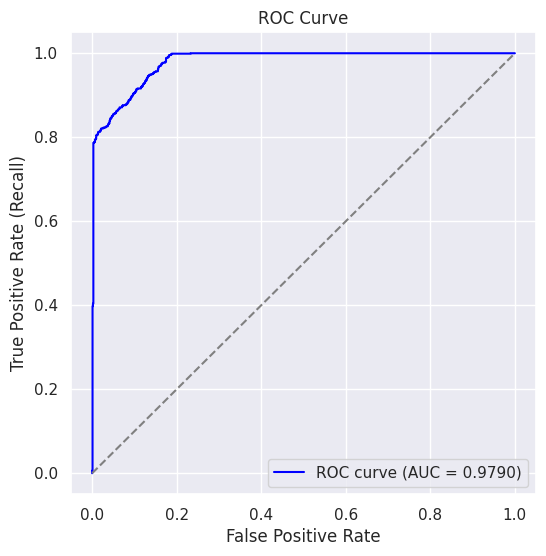

In [138]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

logistic_model_combined = SVC(C=1.0, kernel='rbf', probability=True)
logistic_model_combined.fit(X_train_combined, y_train_combined)

# Get predicted probabilities for the positive class
y_scores = logistic_model_combined.predict_proba(X_test_combined)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_combined, y_scores)

# Compute AUC
auc = roc_auc_score(y_test_combined, y_scores)
print(f"AUC: {auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line = random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Cross-Validation Logistic Regression model


In [139]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Perform 5-fold cross-validation using r2 as the scoring metric on the full dataset
cv_scores = cross_val_score(logistic_model_combined, X_train_combined, y_train_combined, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print the mean and standard deviation
print(f"Mean Cross-validation score: {mean_cv_score:.4f}")
print(f"Standard Deviation of Cross-validation score: {std_cv_score:.4f}")

# Print the accuracy scores for each fold
print("Cross-validation scores for each fold:", cv_scores)

Mean Cross-validation score: 0.5889
Standard Deviation of Cross-validation score: 0.0375
Cross-validation scores for each fold: [0.63189623 0.60472078 0.58248632 0.52072395 0.60446474]


R² on test set: 0.6104118691440925


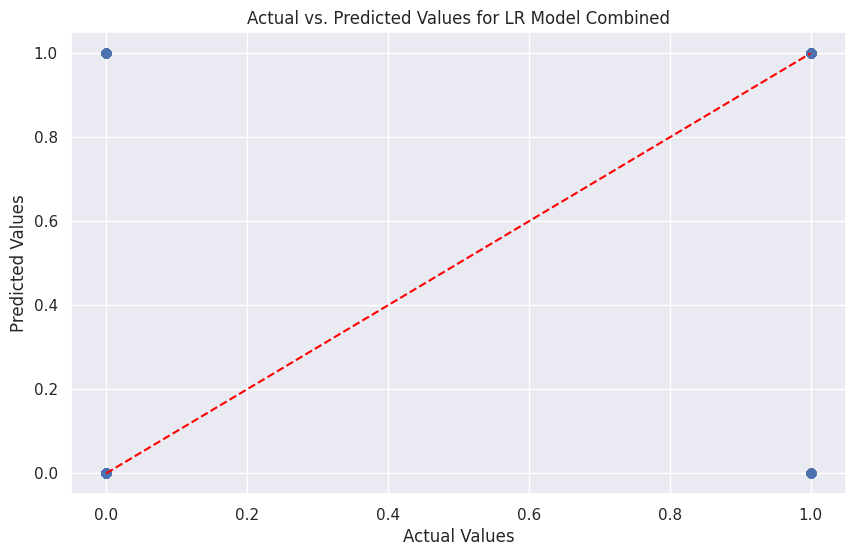

In [141]:
from sklearn.metrics import r2_score

final_model = logistic_model_combined.fit(X_train_combined, y_train_combined)

y_pred = final_model.predict(X_test_combined)

test_r2 = r2_score(y_test_combined, y_pred)
print("R² on test set:", test_r2)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_combined, y_pred, alpha=0.5)

# Add a diagonal line
# Determine the range for the diagonal line based on the data
min_val = min(min(y_test_combined), min(y_pred))
max_val = max(max(y_test_combined), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

# Label the axes and add a title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for LR Model Combined')

# Display the plot
plt.show()

## Interpretation and conclusion (Combined Data)


**Interpretation:**

Comparing this to the Logistic Regression model trained on the original data (with all features), which achieved perfect scores, we see a slight decrease in performance when synthetic data is included.

*   **Accuracy:** Decreased from 1.0000 (original data) to 0.8943 (combined data).
*   **AUC:** Decreased from 1.0000 (original data) to 0.9790 (combined data).
*   **Precision:** Decreased from 1.0000 (original data) to 0.90 and 0.89 (combined data).
*   **Recall:** Decreased from 1.0000 (original data) to 0.90 and 0.89 (combined data).
*   **F1-Score:** Decreased from 1.0000 (original data) to 0.90 and 0.89 (combined data).

This suggests that the synthetic data, generated by randomly sampling from the unique values of the original features, introduced some noise or less clear patterns compared to the original, highly separable data. While the model still performs well, the perfect separation observed with the original data is no longer present.
